# PyCity Schools Overview

* Smaller schools with less than 1,000 students had a 95% overall passing rate and out-perform the largest schools with student sizes over 3,500, which had a 74% passing rate.  These smaller schools also show out-performance in math scores over the larger schools (84 vs 77). Each of these smaller schools were charter schools.


*  There is a trend across both charter and district schools that students achieve higher scores in reading than math. Overall, half (50%) of students achieved a reading score of at least 82 , whereas half (50%) of students achieved math scores at a significantly lower score of at least 72.  And, students who perform well in reading or math are not necessarily likely to achieve high scores in both.  More research needs to be done to understand if these math scores distributions are on par, above, or below national averages.


* 97% of students across charter schools pass reading (score of 70 or higher).  But, while there is a high passing rate in charter schools, the overall average reading score stayed roughly static at 84 across 9th thru 12th grade students. Notably, Holden High School showed a 9th grade student passing rate of 94% and a 12th grade student passing rate of 99%, with the average reading score improving between 9th grade students (84) and 12 grade students (85).


* Within the district Schools, 67% of students pass math.  Notably in the district schools, Figueroa High School was an outlier, showing a 9th grade student passing rate of 64% and a 12th grade student passing rate of 69%.  More research could be done to understand the cause of this improvement, and any such valid insight could be transferred to the remaining district schools.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])


# QA the Data file
#school_data_complete.head()
#school_data_complete['math_score'].describe()


## Summary Overview

In [2]:
# See and work with the field names
#print(school_data_complete.columns)

#Calculating the Summary Overview KPIs

school_num       = school_data_complete['School ID'].nunique()
student_num      = school_data_complete['Student ID'].nunique()
budget_tot       = school_data['budget'].sum()
budget_per       = budget_tot / student_num
math_avg         = school_data_complete['math_score'].mean()
read_avg         = school_data_complete['reading_score'].mean()
perc_pass_math   = school_data_complete[school_data_complete['math_score'] >= 70].count()['math_score']
perc_pass_read   = school_data_complete[school_data_complete['reading_score'] >= 70].count()['reading_score']


perc_math_total  = perc_pass_math / student_num
perc_read_total  = perc_pass_read / student_num
perc_pass_rate   = (perc_math_total + perc_read_total) / 2

# QA the dataframe creates properly
#student_data = pd.DataFrame([student_num])


final_summary = pd.DataFrame({"Number of Schools"  : ['{:,.0f}'.format(school_num)],
                              'Number of Students'   : ['{:,.0f}'.format(student_num)],
                              'Total School Budget'  : ['${:,.0f}'.format(budget_tot)],
                              'Budget Per Student'   : ['${:,.0f}'.format(budget_per)],
                              'Average Math Score'   : ['{:,.0f}'.format(math_avg)],
                              '% Passing Math'       : ['{:,.0%}'.format(perc_math_total)],
                             'Average Reading Score' : ['{:,.0f}'.format(read_avg)],
                             '% Passing Reading' : ['{:,.0%}'.format(perc_read_total)],
                              '% Overall Passing Rate': ['{:,.0%}'.format(perc_pass_rate)]
                              
                             })

# Labeling the Index to be Value: Summary Overview
final_summary.index = ['Summary Overview']
# High Level Overview of School And Student Information

final_summary


,Number of Schools,Number of Students,Total School Budget,Budget Per Student,Average Math Score,% Passing Math,Average Reading Score,% Passing Reading,% Overall Passing Rate
Summary Overview,15,"39,170","$24,649,428",$629,79,75%,82,86%,80%


## School Summary

In [3]:
# student counts, budget totals, Avg budget per student
# I chose to use learn and use the .agg function below
'''
grouped_stud_cnt = school_data_complete.groupby(['school_name','type'])['Student ID'].nunique()
grouped_budg_sum = school_data_complete.groupby(['school_name','type'])['budget'].max()
grouped_per_budg = school_data_complete.groupby(['school_name','type'])['budget'].max() / school_data_complete.groupby(['school_name', 'type'])['Student ID'].count()
# average math and reading scores
grouped_avg_mth  = school_data_complete.groupby(['school_name','type'])['math_score'].mean()
grouped_avg_rea  = school_data_complete.groupby(['school_name','type'])['reading_score'].mean()
'''

# identify students with passing scores of 70 or more:  math and reading
grouped_math_pass = school_data_complete[school_data_complete['math_score'] >= 70].groupby(['school_name', 'type']).count()
grouped_math_pass["Math_Over_70"] = grouped_math_pass['math_score']

grouped_read_pass = school_data_complete[school_data_complete['reading_score'] >= 70].groupby(['school_name', 'type']).count()
grouped_read_pass["Read_Over_70"] = grouped_read_pass['reading_score']

#print(grouped_per_budg.head())

# Group Student Count, Total Budget, Avg Math Score, and Avg Reading Score
all_together = (school_data_complete.groupby(['school_name','type'])
                .agg({'Student ID': 'count', 'budget' : 'max', 'math_score' : 'mean', 'reading_score' : 'mean'}))

    
# Rename columns
all_together = all_together.rename(columns={"Student ID": "Number_of_Students", "budget" : "Total_School_Budget", 
                                            "math_score" : "Average_Math_Score","reading_score" : "Average_Reading_Score"})

#print(all_together)

#NAGA : When dataframes being merged based on index, we should use left_index=True, right_index=True rather than column names
merge_math = pd.merge(all_together, grouped_math_pass, left_index=True, right_index=True)#, on=('school_name', 'type'))

#print(merge_math.columns)

merge_math['%_Passing_Math'] = merge_math['Math_Over_70'] / merge_math['Number_of_Students']

#print(merge_math.columns)

#NAGA : When dataframes being merged based on index, we should use left_index=True, right_index=True rather than column names
merge_read = pd.merge(merge_math,grouped_read_pass, how='outer', left_index=True, right_index=True)#, on=('school_name'))

merge_read['%_Passing_Reading'] = merge_read['Read_Over_70'] /merge_read['Number_of_Students']
#print(merge_read.columns)

merge_read["%_Overall_Passing"]  = (merge_read['%_Passing_Math'] + merge_read['%_Passing_Reading'])/ 2
merge_read["Budget_per_Student"] = merge_read['Total_School_Budget'] / merge_read['Number_of_Students']

# Drop extra fields
# Identified a way to drop columns that are redundant without dropping each on individually
# https://stackoverflow.com/questions/19071199/pandas-dataframe-drop-columns-whose-name-contains-a-specific-string

merge_read = merge_read[merge_read.columns.drop(list(merge_read.filter(regex='_x')))]
merge_read = merge_read[merge_read.columns.drop(list(merge_read.filter(regex='_y')))]
merge_read = merge_read[merge_read.columns.drop(list(merge_read.filter(regex='_70')))]

overview = pd.DataFrame()

overview['Number of Students'] = merge_read['Number_of_Students'].map('{:,.0f}'.format)
overview['Budget per Student']= merge_read['Budget_per_Student'].map('${:,.0f}'.format)
overview['Total School Budget']= merge_read['Total_School_Budget'].map('${:,.0f}'.format)
overview['Average Math Score'] = merge_read['Average_Math_Score'].map('{:,.0f}'.format)
overview['Average Reading Score'] = merge_read['Average_Reading_Score'].map('{:,.0f}'.format)
overview['% Passing Math']    = merge_read['%_Passing_Math'].map('{:.0%}'.format)
overview['% Passing Reading'] = merge_read['%_Passing_Reading'].map('{:.0%}'.format)
overview['% Overall Passing'] = merge_read['%_Overall_Passing'].map('{:.0%}'.format)

overview

# I use this many times to format the output in a cleaner format

def formatting_display():
    overview = pd.DataFrame()
    overview['Number of Students'] = merge_read['Number_of_Students'].map('{:,.0f}'.format)
    overview['Budget per Student']= merge_read['Budget_per_Student'].map('${:,.0f}'.format)
    overview['Total School Budget']= merge_read['Total_School_Budget'].map('${:,.0f}'.format)
    overview['Average Math Score'] = merge_read['Average_Math_Score'].map('{:,.0f}'.format)
    overview['Average Reading Score'] = merge_read['Average_Reading_Score'].map('{:,.0f}'.format)
    overview['% Passing Math']    = merge_read['%_Passing_Math'].map('{:.0%}'.format)
    overview['% Passing Reading'] = merge_read['%_Passing_Reading'].map('{:.0%}'.format)
    overview['% Overall Passing'] = merge_read['%_Overall_Passing'].map('{:.0%}'.format)

    return overview;

summary_overview =formatting_display()
summary_overview



,,Number of Students,Budget per Student,Total School Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Bailey High School,District,"4,976",$628,"$3,124,928",77,81,67%,82%,74%
Cabrera High School,Charter,"1,858",$582,"$1,081,356",83,84,94%,97%,96%
Figueroa High School,District,"2,949",$639,"$1,884,411",77,81,66%,81%,73%
Ford High School,District,"2,739",$644,"$1,763,916",77,81,68%,79%,74%
Griffin High School,Charter,"1,468",$625,"$917,500",83,84,93%,97%,95%
Hernandez High School,District,"4,635",$652,"$3,022,020",77,81,67%,81%,74%
Holden High School,Charter,427,$581,"$248,087",84,84,93%,96%,94%
Huang High School,District,"2,917",$655,"$1,910,635",77,81,66%,81%,74%
Johnson High School,District,"4,761",$650,"$3,094,650",77,81,66%,81%,74%


# # School Summary by Math and Reading Passing Rates

In [4]:
# Displaying only these Values was Interesting for Analyses
summary_shortened = summary_overview[["Number of Students", "Budget per Student", "% Passing Math", "% Passing Reading"]]
summary_shortened.reset_index(drop=True)
summary_shortened.sort_values(by=['type','Number of Students'], ascending=True)


,,Number of Students,Budget per Student,% Passing Math,% Passing Reading
school_name,type,,,,
Griffin High School,Charter,"1,468",$625,93%,97%
Thomas High School,Charter,"1,635",$638,93%,97%
Shelton High School,Charter,"1,761",$600,94%,96%
Wright High School,Charter,"1,800",$583,93%,97%
Cabrera High School,Charter,"1,858",$582,94%,97%
Wilson High School,Charter,"2,283",$578,94%,97%
Holden High School,Charter,427,$581,93%,96%
Pena High School,Charter,962,$609,95%,96%
Ford High School,District,"2,739",$644,68%,79%


## Top Performing Schools (By Passing Rate)

In [5]:

#df.sort(['Peak', 'Weeks'], ascending=[True, False], inplace=True)
merge_read.sort_values(by ='%_Overall_Passing', ascending=[False], inplace=True)

#NAGA: Either do at the end or copy to another dataframe for formatting & display or use style.format options.
# Formatting was done in a new DataFrames because temp formatting does not allow to only take the top 5 and bottom 5 records and still format

performing_overview =formatting_display()


performing_overview.head()


,,Number of Students,Budget per Student,Total School Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Cabrera High School,Charter,"1,858",$582,"$1,081,356",83,84,94%,97%,96%
Thomas High School,Charter,"1,635",$638,"$1,043,130",83,84,93%,97%,95%
Pena High School,Charter,962,$609,"$585,858",84,84,95%,96%,95%
Griffin High School,Charter,"1,468",$625,"$917,500",83,84,93%,97%,95%
Wilson High School,Charter,"2,283",$578,"$1,319,574",83,84,94%,97%,95%


## Bottom Performing Schools (By Passing Rate)

In [6]:
performing_overview.tail()


,,Number of Students,Budget per Student,Total School Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Ford High School,District,"2,739",$644,"$1,763,916",77,81,68%,79%,74%
Johnson High School,District,"4,761",$650,"$3,094,650",77,81,66%,81%,74%
Huang High School,District,"2,917",$655,"$1,910,635",77,81,66%,81%,74%
Figueroa High School,District,"2,949",$639,"$1,884,411",77,81,66%,81%,73%
Rodriguez High School,District,"3,999",$637,"$2,547,363",77,81,66%,80%,73%


## Math Scores by Grade

In [7]:
school_data_complete['math_score'][0]

school_data_complete.columns

# Identified an easy way to pivot the values within a column to make them the column
# Tested both ways

'''
table1 = .pivot_table(index=['type', 'school_name'],
                             columns='grade',
                             values='math_score',
                             aggfunc='mean')
'''
table1 = school_data_complete.pivot_table('math_score', index=['type','school_name'], columns='grade')

column_order = ['9th', '10th', '11th', '12th']
table2 = table1.reindex(column_order, axis=1)

for x in column_order:
    table2[x]=table2[x].map('{:,.1f}'.format)

table2


grade                            9th  10th  11th  12th
type     school_name                                  
Charter  Cabrera High School    83.1  83.2  82.8  83.3
         Griffin High School    82.0  84.2  83.8  83.4
         Holden High School     83.8  83.4  85.0  82.9
         Pena High School       83.6  83.4  84.3  84.1
         Shelton High School    83.4  82.9  83.4  83.8
         Thomas High School     83.6  83.1  83.5  83.5
         Wilson High School     83.1  83.7  83.2  83.0
         Wright High School     83.3  84.0  83.8  83.6
District Bailey High School     77.1  77.0  77.5  76.5
         Figueroa High School   76.4  76.5  76.9  77.2
         Ford High School       77.4  77.7  76.9  76.2
         Hernandez High School  77.4  77.3  77.1  77.2
         Huang High School      77.0  75.9  76.4  77.2
         Johnson High School    77.2  76.7  77.5  76.9
         Rodriguez High School  76.9  76.6  76.4  77.7

## Reading Scores by Grade


In [8]:
school_data_complete.columns

table = school_data_complete.pivot_table(index=['type', 'school_name'],
                             columns='grade',
                             values='reading_score',
                             aggfunc='mean')

column_order = ['9th', '10th', '11th', '12th']
table3 = table.reindex(column_order, axis=1)

for x in column_order:
    table3[x]=table3[x].map('{:,.1f}'.format)

table3



grade                            9th  10th  11th  12th
type     school_name                                  
Charter  Cabrera High School    83.7  84.3  83.8  84.3
         Griffin High School    83.4  83.7  84.3  84.0
         Holden High School     83.7  83.3  83.8  84.7
         Pena High School       83.8  83.6  84.3  84.6
         Shelton High School    84.1  83.4  84.4  82.8
         Thomas High School     83.7  84.3  83.6  83.8
         Wilson High School     83.9  84.0  83.8  84.3
         Wright High School     83.8  83.8  84.2  84.1
District Bailey High School     81.3  80.9  80.9  80.9
         Figueroa High School   81.2  81.4  80.6  81.4
         Ford High School       80.6  81.3  80.4  80.7
         Hernandez High School  80.9  80.7  81.4  80.9
         Huang High School      81.3  81.5  81.4  80.3
         Johnson High School    81.3  80.8  80.6  81.2
         Rodriguez High School  81.0  80.6  80.9  80.4

# Reading Scores by Grade

In [9]:
import numpy as np

read = []
math = []
gend  = []
school_type = []


for x in school_data_complete['reading_score']:
    
        read.append(x)
        math.append(school_data_complete['math_score'][x])
        gend.append(school_data_complete['gender'][x])
        school_type.append(school_data_complete['type'][x])
   

perc_math = np.array(math)
perc_read = np.array(read)

# This list will pull into my def function 
percentiles = [25,50,75,90]

# printing out the percentiles for math and reading scores

def scores(input,text):

    for percentile in percentiles:
        print (f'{percentile}% of students achieved a {text} of {"{:.0f}".format(np.percentile(input,percentile))} or below ')


print('MATH SCORES')
scores(perc_math,'Math Score')
print(' ')
print('READING SCORES')
scores(perc_read,'Reading Score')


MATH SCORES
25% of students achieved a Math Score of 61 or below 
50% of students achieved a Math Score of 72 or below 
75% of students achieved a Math Score of 84 or below 
90% of students achieved a Math Score of 91 or below 
 
READING SCORES
25% of students achieved a Reading Score of 73 or below 
50% of students achieved a Reading Score of 82 or below 
75% of students achieved a Reading Score of 91 or below 
90% of students achieved a Reading Score of 96 or below 


## Scores by School Spending

#### NOTE: Number of Students and Total Budget are actually Averages
#### These field names are not renamed

In [10]:
#was not clear how to adjust field name based on getting formatting of values

# Bins and Group Labels of the Bins
bins = [578, 600, 625, 650, 655]
group_labels = ["$575-600", "$600-625", "$625-650", "$650-655"]



merge_read["Budg_per_Student"] = pd.cut(merge_read["Budget_per_Student"], bins, labels=group_labels)


# Naga recommended temporary formatting.  This works when not needing to do a head() or tail() 


merge_read.groupby(["Budg_per_Student"]).mean().style.format({
    'Number_of_Students':'{:,.0f}'.format,
    'Budget_per_Student': '${:,.0f}'.format,
    'Total_School_Budget': '${:,.0f}'.format,
    'Average_Math_Score' : '{:,.0f}'.format,
    'Average_Reading_Score' : '{:,.0f}'.format,
    '%_Passing_Math' : '{:.0%}'.format,
    '%_Passing_Reading' : '{:.0%}'.format,
    '%_Overall_Passing' : '{:.0%}'.format
    })

  


,Number_of_Students,Total_School_Budget,Average_Math_Score,Average_Reading_Score,%_Passing_Math,%_Passing_Reading,%_Overall_Passing,Budget_per_Student
Budg_per_Student,,,,,,,,
$575-600,"1,462","$858,861",83,84,93%,96%,95%,$586
$600-625,"1,215","$751,679",84,84,94%,97%,95%,$617
$625-650,"3,510","$2,243,066",78,81,71%,83%,77%,$639
$650-655,"3,776","$2,466,328",77,81,66%,81%,74%,$654


## Scores by School Size

#### NOTE: Number of Students and Total Budget are actual Averages
#### These field names are not renamed

In [11]:
# Bin Definitions for Student School Size
size_bins = [0, 1500, 3500, 5000]
group_names = ["Small (470-1500)", "Medium (1500-3500)", "Large (3500-5000)"]

merge_read["Student_School_Size"] = pd.cut(merge_read["Number_of_Students"], size_bins, labels=group_names)

# Naga recommended temporary formatting.  This works when not needing to do a head() or tail() 
# but could not rename the fields (or at least did not know how to do this step)
merge_read.groupby(["Student_School_Size"]).mean().style.format({
   'Number_of_Students':'{:,.0f}'.format,
    'Budget_per_Student': '${:,.0f}'.format,
    'Total_School_Budget': '${:,.0f}'.format,
    'Average_Math_Score' : '{:,.0f}'.format,
    'Average_Reading_Score' : '{:,.0f}'.format,
    '%_Passing_Math' : '{:.0%}'.format,
    '%_Passing_Reading' : '{:.0%}'.format,
    '%_Overall_Passing' : '{:.0%}'.format
    })


,Number_of_Students,Total_School_Budget,Average_Math_Score,Average_Reading_Score,%_Passing_Math,%_Passing_Reading,%_Overall_Passing,Budget_per_Student
Student_School_Size,,,,,,,,
Small (470-1500),952,"$583,815",84,84,93%,96%,95%,$605
Medium (1500-3500),"2,243","$1,388,628",81,83,84%,91%,87%,$615
Large (3500-5000),"4,593","$2,947,240",77,81,66%,81%,74%,$642


## Scores by Charter or District Schools

#### NOTE: Number of Students and Total Budget are actual Averages
#### These field names are not renamed

In [12]:
# groupbing by School Type
merge_read.groupby(["type"]).mean().style.format({
    'Number_of_Students':'{:,.0f}'.format,
    'Budget_per_Student': '${:,.0f}'.format,
    'Total_School_Budget': '${:,.0f}'.format,
    'Average_Math_Score' : '{:,.0f}'.format,
    'Average_Reading_Score' : '{:,.0f}'.format,
    '%_Passing_Math' : '{:.0%}'.format,
    '%_Passing_Reading' : '{:.0%}'.format,
   
    '%_Overall_Passing' : '{:.0%}'.format
       })

,Number_of_Students,Total_School_Budget,Average_Math_Score,Average_Reading_Score,%_Passing_Math,%_Passing_Reading,%_Overall_Passing,Budget_per_Student
type,,,,,,,,
Charter,"1,524","$912,688",83,84,94%,97%,95%,$600
District,"3,854","$2,478,275",77,81,67%,81%,74%,$644


# Coorelation Assessment between Student Reading and Math Scores

      There is no coorelation between students 
            reading and math score: 0.13


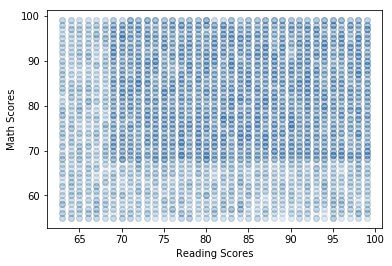

In [13]:
import matplotlib.pyplot as plt

#plt.scatter(school_data_complete['reading_score'], school_data_complete['math_score'])

plt.scatter(school_data_complete['reading_score'],school_data_complete['math_score'], alpha=.01)
plt.xlabel('Reading Scores')
plt.ylabel('Math Scores')
#plt.show()

#len(read)
#school_data_complete.describe()

# Taran helped me to identify a way to see the coorelation with Numpy
# the scatter plot I did was an indication of no coorelation and was looking for a function to display
coorelation = np.corrcoef(read, math)[0,1]

if coorelation < .50:
 print(f'{"":<4}  There is no coorelation between students \n {"":<10} reading and math score: {"{:.2f}".format(coorelation)}')
else:
 print(f'{"":<4}  There is coorelation between students \n {"":<10} reading and math score: {"{:.2f}".format(coorelation)}')

# # Boxplots that Show Score differences between Math and Reading

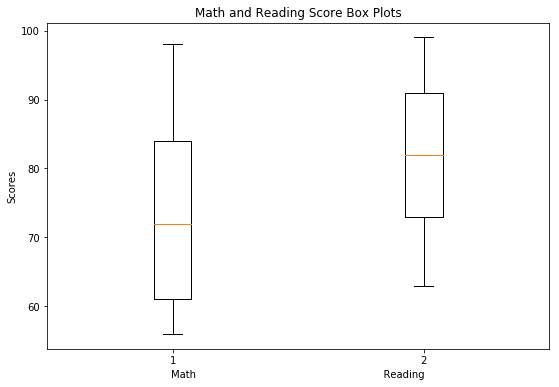

In [14]:
'''
plt.boxplot(math, showmeans=True)
plt.grid()
plt.title('Math Score Boxplot')
plt.ylabel('Math Score')
plt.show()
'''

# combining the math and reading scores to do a box plot comparison
mathandreadscores =[math,read]

# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create the axes needed
ax = fig.add_subplot(111)
ax.set_title('Math and Reading Score Box Plots')
ax.set_xlabel('Math                                                            Reading')
ax.set_ylabel('Scores') 

# Create boxplot
boxplot = ax.boxplot(mathandreadscores)




## % of Students that Pass Math by Grade


In [30]:
# Create a new dataframe that takes all the fields before dropping
# Using all code from to get calcuations 

perc_trend_grade = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

#print(perc_trend_grade.head())
#df_with_grade = merge_read[['Number_of_Students', 'grade_x', '%_Passing_Math','%_Passing_Reading']]
#print(df_with_grade.info())

# Calculating % Passing Math and Reading - this process COUNTS the students <= 70
trend_math_pass = perc_trend_grade[perc_trend_grade['math_score'] >= 70].groupby(['school_name', 'type','grade']).count()
trend_math_pass["Math_Over_70"] = trend_math_pass['math_score']

trend_read_pass = perc_trend_grade[perc_trend_grade['reading_score'] >= 70].groupby(['school_name', 'type','grade']).count()
trend_read_pass["Read_Over_70"] = trend_read_pass['reading_score']

# Group Student Count, Total Budget, Avg Math Score, and Avg Reading Score
trend_together = (perc_trend_grade.groupby(['school_name','type','grade'])
                .agg({'Student ID': 'count', 'budget' : 'max', 'math_score' : 'mean', 'reading_score' : 'mean'}))

    
# Rename columns
trend_together = trend_together.rename(columns={"Student ID": "Number_of_Students", "budget" : "Total_School_Budget", 
                                            "math_score" : "Average_Math_Score","reading_score" : "Average_Reading_Score"})

########
#NAGA : When dataframes being merged based on index, we should use left_index=True, right_index=True rather than column names
merge_trend_math = pd.merge(trend_together, trend_math_pass, left_index=True, right_index=True)#, on=('school_name', 'type'))

#print(merge_math.columns)

merge_trend_math['%_Passing_Math'] = merge_trend_math['Math_Over_70'] / merge_trend_math['Number_of_Students']

#NAGA : When dataframes being merged based on index, we should use left_index=True, right_index=True rather than column names
merge_trend = pd.merge(merge_trend_math,trend_read_pass, how='outer', left_index=True, right_index=True)#, on=('school_name'))

# Calculating the % of Students of 70 in Reading and OVerall
merge_trend['%_Passing_Reading'] = merge_trend['Read_Over_70'] /merge_trend['Number_of_Students']
#print(merge_trend)
merge_trend["%_Overall_Passing"]  = (merge_trend['%_Passing_Math'] + merge_trend['%_Passing_Reading'])/ 2



#reset index - need to remove the indexes in order to do the transpose
df_final = merge_trend.reset_index()


# I finallly figured out how to do this! and myself... 12-9-2018.  
#keep only the fields I wish to transpose
# Keep only necessary data fields for the analyses BY GRADE
df_final_trend = df_final[['school_name', 'type','grade','%_Passing_Math', '%_Passing_Reading']]

df_final_trend.head()

# Transpose the grade field - group by your desired indexes and then unstack grade and use passing math 
dfmath =df_final_trend.groupby(['type','school_name','grade'])['%_Passing_Math'].aggregate('first').unstack()
dfmath


# Sending data to CSV to assess - need to figure out how to transpose values to fields for big data sets

#df_Math = merge_trend[['%_Passing_Math']]
# Export to CSV to manipulate the data
#df_Math.to_csv('PyCitySchools-Math-PercentStudentsPassingbyGrade.csv', sep=',')
#df_Reading = merge_trend[['%_Passing_Reading']]
# Export to CSV to manipulate the data
#df_Reading.to_csv('PyCitySchools-Reading-PercentStudentsPassingbyGrade.csv', sep=',')



#Efforts to figure out how to transpose values to a column
#print(df_math)
#print(df_final_trend)
#df_final = df_math.reset_index(grade)
#df_final.assign(grade=df_final_trend.index.get_level_values('grade'))
#column_order = ['9th', '10th', '11th', '12th']
#df_math.set_index('grade').T
#df.reset_index().groupby(['id', 'key'])['val'].aggregate('first').unstack()
#table_math_ftrend = df_final.reindex(['school_name', 'type', column_order], axis=1)
#df_math.set_index([df_final.index,'grade'])['%_Passing_Math'].unstack()
#df_final_trend.reset_index(df_final_trend['grade'], inplace=True)
#df_math.set_index(['school_name', 'type', 'grade' ,'%_Passing_Math'])['grade'].unstack()
#print(df_math.head())



grade                               10th      11th      12th       9th
type     school_name                                                  
Charter  Cabrera High School    0.939914  0.923237  0.950262  0.952652
         Griffin High School    0.940887  0.941828  0.928082  0.924205
         Holden High School     0.929825  0.912621  0.951807  0.913386
         Pena High School       0.944000  0.960938  0.950276  0.930909
         Shelton High School    0.933036  0.949029  0.940701  0.933962
         Thomas High School     0.940618  0.925301  0.928994  0.934924
         Wilson High School     0.942244  0.936561  0.944072  0.933439
         Wright High School     0.932099  0.926437  0.932249  0.941176
District Bailey High School     0.663438  0.684253  0.642996  0.671468
         Figueroa High School   0.665793  0.653032  0.685990  0.641355
         Ford High School       0.693503  0.687405  0.654917  0.689076
         Hernandez High School  0.667482  0.668199  0.667377  0.667149
         Huang High School      0.634941  0.647712  0.661538  0.681280
         Johnson High School    0.651182  0.669449  0.650641  0.667857
         Rodriguez High School  0.658654  0.654076  0.681876  0.664089

## % of Students that Pass Ready by Grade

In [29]:
dfread =df_final_trend.groupby(['type','school_name','grade'])['%_Passing_Reading'].aggregate('first').unstack()
dfread

grade                               10th      11th      12th       9th
type     school_name                                                  
Charter  Cabrera High School    0.974249  0.970954  0.968586  0.967803
         Griffin High School    0.972906  0.975069  0.979452  0.960880
         Holden High School     0.964912  0.961165  0.987952  0.944882
         Pena High School       0.956000  0.949219  0.944751  0.981818
         Shelton High School    0.937500  0.973301  0.954178  0.967925
         Thomas High School     0.976247  0.971084  0.961538  0.980477
         Wilson High School     0.962046  0.966611  0.964206  0.968304
         Wright High School     0.969136  0.972414  0.964770  0.958824
District Bailey High School     0.835351  0.805755  0.813230  0.821674
         Figueroa High School   0.812582  0.781382  0.819646  0.815421
         Ford High School       0.790960  0.799697  0.782931  0.795918
         Hernandez High School  0.806846  0.817096  0.797441  0.811143
         Huang High School      0.821382  0.805825  0.811966  0.812796
         Johnson High School    0.814996  0.796327  0.819444  0.818571
         Rodriguez High School  0.802885  0.808151  0.792142  0.803265